In [69]:
import json

import pandas as pd
import geopandas as gpd
import fiona
import altair as alt
from vega_datasets import data
import folium

In [2]:
fname = "../data/_Onefootball_3_1_Exozet.gpx"

In [3]:
fiona.listlayers(fname)

['waypoints', 'routes', 'tracks', 'route_points', 'track_points']

In [32]:
# https://geopandas.org/io.html#reading-spatial-data
gdf = gpd.read_file(fname, layer="track_points")[['track_seg_point_id', 'ele', 'time', 'geometry']].rename(columns=dict(track_seg_point_id="id"))
gdf.time = pd.to_datetime(gdf.time, format='%Y-%m-%dT%H:%M:%S')
gdf.dtypes

id                   int64
ele                float64
time        datetime64[ns]
geometry          geometry
dtype: object

## TODO

find heartrate d

In [33]:
gdf.sample(10)

,id,ele,time,geometry
1149,1149,74.4,2020-03-09 19:05:56,POINT (13.40962 52.54375)
1002,1002,72.8,2020-03-09 18:59:35,POINT (13.40952 52.54357)
409,409,73.6,2020-03-09 18:31:38,POINT (13.40907 52.54338)
766,766,74.2,2020-03-09 18:49:34,POINT (13.40932 52.54363)
845,845,73.0,2020-03-09 18:53:07,POINT (13.40936 52.54365)
372,372,73.2,2020-03-09 18:30:04,POINT (13.40907 52.54346)
194,194,78.4,2020-03-09 18:22:41,POINT (13.40970 52.54346)
504,504,73.8,2020-03-09 18:35:40,POINT (13.40945 52.54350)
1100,1100,72.4,2020-03-09 19:03:43,POINT (13.40954 52.54366)
424,424,73.8,2020-03-09 18:32:33,POINT (13.40949 52.54337)


Altair recipe:
- alt.Chart() => dataframe
- .mark_xx() => the kind of chart point
- .encode() => how to encode the data in the df for the chart
- .properties().interactive() => other properties, independent of data

In [60]:
(
    alt
    .Chart(gdf)
    .mark_geoshape(
        stroke='white'
    )
    .encode(
        color=alt.Color('ele'),
    )
    .properties(
        width=600,
        height=500
    )
)

alt.Chart(...)

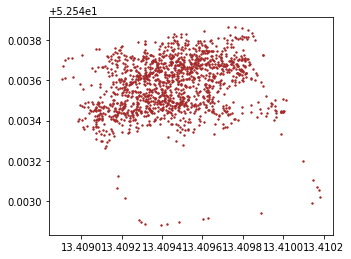

In [73]:
gdf.plot(markersize=2, color="brown")

In [121]:
max_zoom = 18
m = folium.Map(
    location=[gdf.geometry.y.mean(), gdf.geometry.x.mean()], 
    zoom_start=max_zoom,
   zoom_control=False,
   scrollWheelZoom=False,
   dragging=False
)
# folium.GeoJson(gdf.drop('time', axis=1).sample(100)).add_to(m)
m